In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<AxesSubplot: title={'center': 'Data'}, xlabel='x', ylabel='y'>

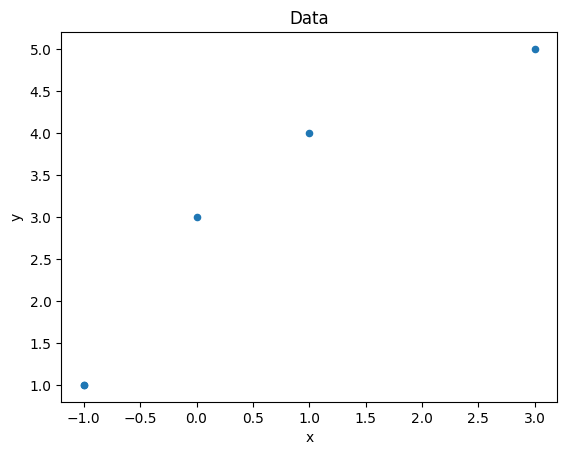

In [3]:
data = pd.DataFrame({"x": [-1, -1, 0, 1, 3], "y": [1, 1, 3, 4, 5]})
learning_rate = 0.01
steps = 100

data.plot.scatter(x="x", y="y", title="Data")

In [4]:
from random import random


def gradient_descent(x, y, learning_rate: float, n_iter: int, draw=True) -> tuple[float,float,float]:
    a = random()
    b = random()

    if draw:
        fig, ax = plt.subplots(1, 2)
    
    def linear(x):
        return a * x + b

    for i in range(n_iter):
        pred = [linear(x_i) for x_i in x]


        mse = sum(map(lambda v: (v[0] - v[1]) ** 2, zip(y, pred))) / len(y)
        derivative_a = (
            2 * sum(map(lambda v: -v[0] * (v[1] - v[2]), zip(x, y, pred))) / len(y)
        )
        derivative_b = 2 * sum(map(lambda v: -(v[0] - v[1]), zip(y, pred))) / len(y)

        a = a - learning_rate * derivative_a
        b = b - learning_rate * derivative_b

        if draw:
            ax[0].plot(x, pred)
            ax[1].scatter(i, mse)


    if draw:
        ax[0].scatter(x, y)
        fig.show()

    return (a,b,mse)


/tmp/ipykernel_50888/379922965.py:34: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(1.0875679291915523, 2.113110453845793, 0.31633937280968405)

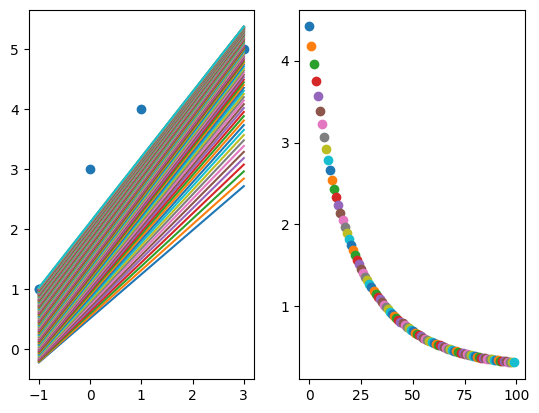

In [5]:
gradient_descent(data["x"], data["y"], learning_rate, steps)

In [6]:

def gradient_descent_np(x, y, learning_rate: float, n_iter: int, draw=True) -> tuple[float, float, float]:
    a = random()
    b = random()

    if draw:
        fig, ax = plt.subplots(1, 2)

    def linear(x):
        return a * x + b
    
    for i in range(n_iter):
        pred = linear(x)

        if draw:
            ax[0].plot(x, pred)

        # mse = np.mean(np.sum((y - pred) ** 2))
        mse = np.sum((y - pred) ** 2) / len(y)
        # derivative_a = np.mean(2 * np.sum(-x * (y - pred)))
        derivative_a = 2 * np.sum(-x * (y - pred)) / len(y)
        # derivative_b = np.mean(2 * np.sum(-(y - pred)))
        derivative_b = 2 * np.sum(-(y - pred)) / len(y)

        a = a - learning_rate * derivative_a
        b = b - learning_rate * derivative_b

        if draw:
            ax[1].scatter(i, mse)

    if draw:
        ax[0].scatter(x, y)
        fig.show()
    
    return (a,b,mse)


/tmp/ipykernel_50888/2341695393.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(1.0935589031756272, 2.0768484134513456, 0.33724486730159375)

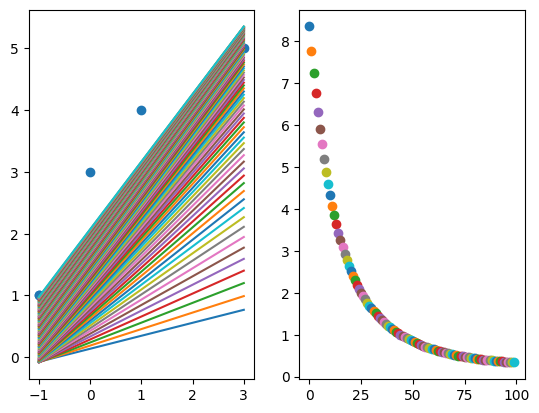

In [7]:
gradient_descent_np(data["x"], data["y"], learning_rate, steps)

In [8]:
from sklearn import datasets

data = datasets.load_boston()
data = pd.DataFrame(data.data, columns=data["feature_names"])
data = data[["NOX", "DIS"]]
X = data["NOX"]
y = data["DIS"]
data

/home/mroso/.local/share/virtualenv/jupyter/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

,NOX,DIS
0,0.538,4.0900
1,0.469,4.9671
2,0.469,4.9671
3,0.458,6.0622
4,0.458,6.0622
...,...,...
501,0.573,2.4786
502,0.573,2.2875
503,0.573,2.1675
504,0.573,2.3889


In [11]:
my_result = gradient_descent_np(X, y, 0.05, 10000, draw=False)

In [12]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(pd.DataFrame(X), y)
mse = reg.score(pd.DataFrame(X), y)

print(f"my_result:\t\t{my_result}\nsklearn_result:\t\t{reg.coef_[0], reg.intercept_, mse}")

my_result:		(-13.977748934918198, 11.548427669971634, 1.8067642696982587)
sklearn_result:		(-13.978323519135289, 11.548749680948145, 0.5917149670934201)
